# Sistema de Detecção de Adulteração em Vinhos

## **1. Dataset e Contexto**

Utilizaremos o *dataset* **_Wine_**, o qual é formado por resultados de uma análise química de vinhos cultivados em uma mesma região na Itália, mas derivados de três uvas diferentes. 

Ele é composto por *features* numéricas que descrevem componentes como álcool, ácido málico, cinzas, alcalinidade, magnésio, fenóis, flavonoides, entre outros. Além disso, é frequentemente usado para classificação de tipos de uva, análises de correlação química e modelagem de perfis de qualidade.

## **2. Aplicação e Problemática**

No mercado de vinhos de luxo, a fraude por mistura é um desafio. Vinhos de alta linhagem (*premium*) são frequentemente misturados com vinhos de menor custo para aumentar a margem de lucro, mantendo um perfil aceitável para consumidores leigos, mas alterando a integridade química do produto. Então, nosso objetivo com essa aplicação é **detectar a adulteração química nos vinhos**.

Este é um problema de **classificação multiclasse supervisionada multivariado**. Vamos abordá-lo de forma **paramétrica**, assumindo que as propriedades químicas de cada vinho seguem um padrão estatístico fixo.

O modelo será **preditivo**, focado na classificação da amostra e no calculo da probabilidade de ela pertencer a cada classe. Dessa forma, os vinhos que deixarem o modelo com muita dúvida sobre sua categoria serão sinalizados como possíveis fraudes.

## **3. Função Objetivo**

A função objetivo do nosso modelo é definida pela maximização da confiabilidade, usando a probabilidade calculada pelo modelo como um **score de autenticidade**. 

Na prática, buscamos configurar o modelo para que ele não apenas classifique o vinho, mas que opere com um limiar de corte (*threshold*) e consiga identificar e separar como suspeitas todas as amostras que não atinjam um nível mínimo de certeza. 

## **4. Modelagem da Saída**

A saída é modelada de forma a apresentar a classe predita acompanhada da sua probabilidade de certeza. **Se a probabilidade for inferior a um limite pré-estabelecido (ex: 80%)**, o sistema rotula a saída como **"adulterado"**, caso contrário, é rotulado como **"não adulterado"**.

## **5. Entradas**

In [90]:
from sklearn.datasets import load_wine

wine = load_wine()
X, y = wine.data, wine.target

### **5.1 Sumário**

| **Feature (Variável)**   | **Unidade Padrão (Estimada)** | **Descrição Técnica & Significado**                                               |
| ------------------------ | ----------------------------- | --------------------------------------------------------------------------------- |
| **Alcohol**              | $\%$ vol (graus)              | Porcentagem de etanol por volume. Define o "corpo" do vinho.                      |
| **Malic Acid**           | $g/L$ (gramas/litro)          | Principal ácido orgânico. Afeta a acidez percebida (pH).                          |
| **Ash**                  | $g/L$                         | Resíduo mineral seco após incineração.                                            |
| **Alcalinity of Ash**    | $meq/L$                       | Miliequivalentes por litro. Medida da capacidade de neutralizar ácidos.           |
| **Magnesium**            | $mg/L$ (ppm)                  | Mineral essencial. Note a escala em miligramas (valor numérico alto).             |
| **Total Phenols**        | $g/L$ (GAE*)                  | Medida agregada de compostos fenólicos (antioxidantes).                           |
| **Flavanoids**           | $g/L$ (GAE*)                  | Subgrupo de fenóis. Altamente correlacionado com a qualidade da uva.              |
| **Nonflavanoid Phenols** | $g/L$ (GAE*)                  | Fenóis ácidos (ex: ácido gálico). Contribuem para o amargor.                      |
| **Proanthocyanins**      | $mg/L$                        | Taninos condensados. Responsáveis pela adstringência.                             |
| **Color Intensity**      | Absorbância ($A$)             | Soma das absorbâncias em comprimentos de onda específicos (ex: 420nm + 520nm).    |
| **Hue**                  | Adimensional ($\emptyset$)    | Razão entre absorbâncias (cor indica oxidação). Valores altos = alaranjado/velho. |
| **OD280/OD315**          | Adimensional ($\emptyset$)    | Razão de densidade óptica. Indica pureza proteica e diluição.                     |
| **Proline**              | $mg/L$                        | Aminoácido mais abundante. Principal diferenciador de maturação.                  |

In [91]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine(as_frame=True)
df: pd.DataFrame = wine.frame

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### **5.2 Tipos e Valores Ausentes** 

| **Feature (Variável)**   | **Non-Null Count** | **Dtype** |
| ------------------------ | ------------------ | --------- |
| **Alcohol**              | 178 non-null       | float64   |
| **Malic Acid**           | 178 non-null       | float64   |
| **Ash**                  | 178 non-null       | float64   |
| **Alcalinity of Ash**    | 178 non-null       | float64   |
| **Magnesium**            | 178 non-null       | float64   |
| **Total Phenols**        | 178 non-null       | float64   |
| **Flavanoids**           | 178 non-null       | float64   |
| **Nonflavanoid Phenols** | 178 non-null       | float64   |
| **Proanthocyanins**      | 178 non-null       | float64   |
| **Color Intensity**      | 178 non-null       | float64   |
| **Hue**                  | 178 non-null       | float64   |
| **OD280/OD315**          | 178 non-null       | float64   |
| **Proline**              | 178 non-null       | float64   |
| **Class**                | 178 non-null       | int64     |

Portanto, conclui-se que o dataset já está **limpo** e não será preciso utilizar técnicas para o tratamento de valores ausentes. 

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

### **5.3 Análise de Algumas Métricas Sobre as Features**

Com a vizualização de algumas métricas sobre as features, é possivel enxergar uma grande **desproporção de escala** entre os valores de algumas variáveis, como entre as features **flavanoids** e **proline**. Desse modo, isso indica que teremos que utilizar alguma **técnica de escalonamento** na etapa de pré-processamento. Caso isso não seja feito, essa desproporção de escalas impactará de forma negativa na performance de certos algoritmos, como SVM e KNN, se tais sejam escolhidos.

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


### **5.4 Correlação Entre as Features**

<Axes: >

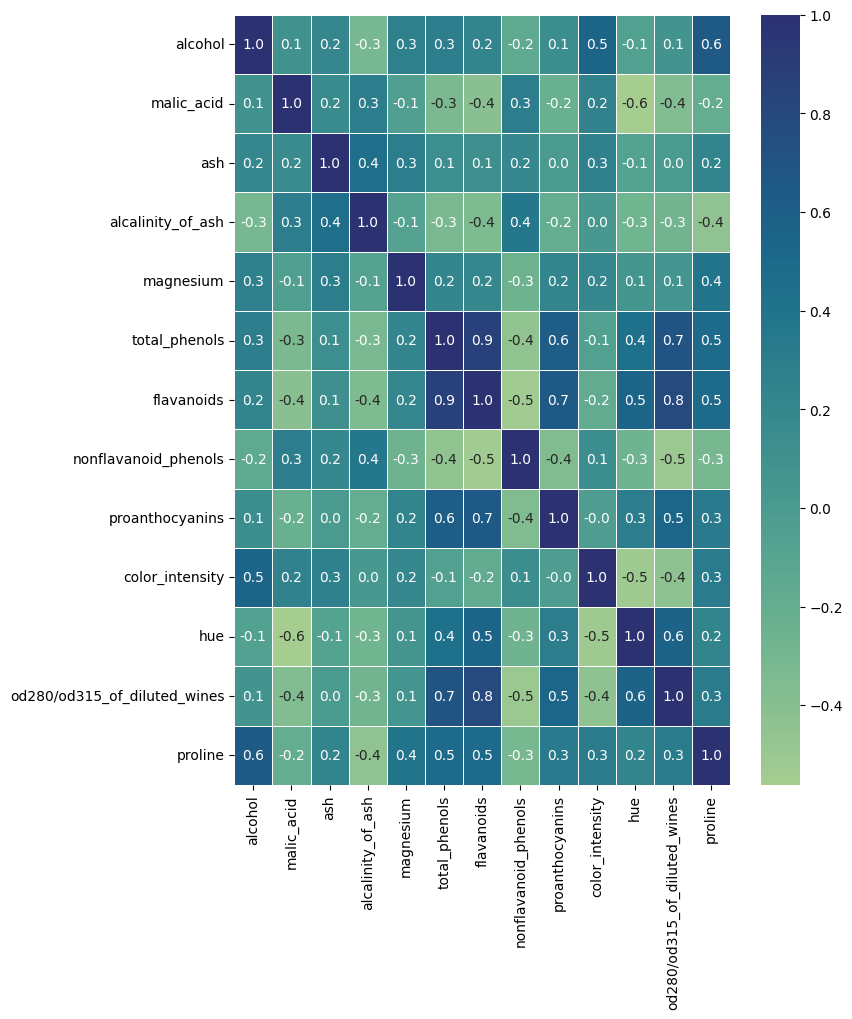

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.drop(columns="target").corr()

plt.figure(figsize=(8, 10))
sns.heatmap(corr, cmap="crest", annot=True, fmt=".1f", linewidths=0.5)

## **6. Pré-processamento**

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns="target"),
    df["target"],
    test_size=0.2,
    stratify=df["target"],
    random_state=42,
)

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessing = Pipeline(
    [
        ("scaler", StandardScaler()),
    ]
)

## **7. Escolha do Modelo**

A **Regressão Logística** foi o modelo escolhido, pois obteve uma performace melhor do que os outros dois algoritmos testados, SVM e Random Forest. Um fator relevante também para a escolha da Regressão Logística como algoritmo final foi a sua **simplicidade** e **interpretabilidade**.

In [99]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

models = {
    "SVM": SVC(kernel="rbf", C=1.0, probability=True, random_state=42),
    "forest": RandomForestClassifier(random_state=42),
    "logistic_reg": LogisticRegression(random_state=42),
}

results = {}

# Loop de validação, é aplicado o cross-validation em cada um dos modelos, ao final é selecionado o modelo com maior acurácia
for name, model in models.items():
    pipeline = Pipeline([("preprocessing", preprocessing), ("model", model)])

    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    results[name] = {
        "mean_accuracy": cv_scores.mean(),
        "std_score": cv_scores.std(),
        "pipeline": pipeline,
    }

    print(
        f"{name}: Accuracy: {cv_scores.mean() * 100:.4f}%, Std: {cv_scores.std() * 100:.4f}%"
    )

best_model_name = max(results, key=lambda k: results[k]["mean_accuracy"])
model = results[best_model_name]["pipeline"]

print(f"O modelo escolhido através do cross-validation foi: {best_model_name}")

model.fit(X_train, y_train)

SVM: Accuracy: 98.6207%, Std: 2.7586%
forest: Accuracy: 98.6207%, Std: 2.7586%
logistic_reg: Accuracy: 99.3103%, Std: 1.3793%
O modelo escolhido através do cross-validation foi: logistic_reg


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True


## **8. Métricas**

As métricas escolhidas foram: 

- **Acurácia**: Representa a porcentagem total de acertos do modelo.

- **Log Loss**: Mede a incerteza das previsões do modelo.

- **Recall**: Mede a capacidade do modelo de encontrar todos os casos positivos de uma classe específica.

- **Rejection Rate**: Mede a porcentagem de vinhos considerados adulterados.

- **Confusion Matrix**

In [112]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, recall_score
from typing import List, Tuple
import numpy as np


def get_metrics(
    model, X_test: np.ndarray, y_test: np.ndarray
) -> Tuple[float, float, np.ndarray]:
    """
    Calcula métricas essenciais de classificação para avaliação do modelo.

    Esta função gera a acurácia, o log loss (para incerteza) e a matriz de confusão,
    permitindo uma visão da performance do classificador.
    """
    y_pred_prob = model.predict_proba(X_test)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="weighted")
    ll = log_loss(y_test, y_pred_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return acc, recall, ll, conf_matrix


def is_adulterated(model, X_test: np.ndarray, treshold: float) -> List[bool]:
    """
    Identifica potenciais vinhos adulterados baseando-se na incerteza do modelo (Rejeição).

    Se a maior probabilidade predita pelo modelo para uma amostra for menor que o
    limiar (threshold) definido, a amostra é marcada como adulterada/desconhecida.
    """

    probs = model.predict_proba(X_test)

    max_probs = np.max(probs, axis=1)

    results = max_probs < treshold

    # Calcula a porcentagem de vinhos considerados adulterados
    n_rejeictions = np.sum(results)
    rejection_rate = n_rejeictions / len(results)

    return results, rejection_rate

In [113]:
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)
max_probs = np.max(y_probs, axis=1)

df_results = pd.DataFrame(
    {
        "real_class": y_test,
        "predict_class": y_pred,
        "probabiliy_predict_class": max_probs,
        "is_adulterated": results,
    }
)

df_results["is_adulterated"] = df_results["is_adulterated"].apply(
    lambda x: "adulterated" if x == True else "unadulterated"
)

df_results

,real_class,predict_class,probabiliy_predict_class,is_adulterated
10,0,0,0.999671,unadulterated
134,2,1,0.540423,adulterated
28,0,0,0.992000,unadulterated
121,1,1,0.707467,adulterated
62,1,1,0.962313,unadulterated
51,0,0,0.999166,unadulterated
7,0,0,0.999352,unadulterated
66,1,1,0.957335,unadulterated
129,1,1,0.942904,unadulterated
166,2,2,0.997337,unadulterated


Accuracy in test set: 97.22%
Recall in test set: 97.22%
Log Loss in test set: 7.38%
Rejection Rate in test set: 11.11%


<Axes: >

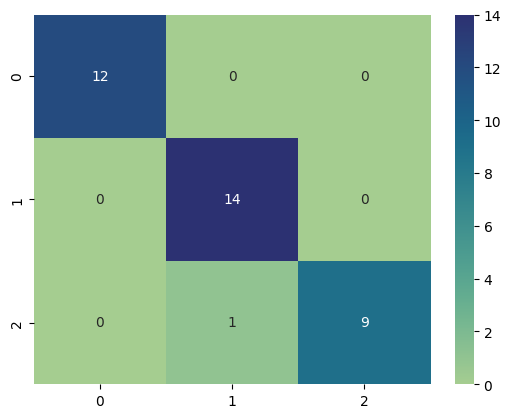

In [114]:
acc, recall, ll, conf_matrix = get_metrics(model, X_test, y_test)

treshold = 0.8
results, rejection_rate = is_adulterated(model, X_test, treshold)

print(f"Accuracy in test set: {acc * 100:.2f}%")
print(f"Recall in test set: {recall * 100:.2f}%")
print(f"Log Loss in test set: {ll * 100:.2f}%")
print(f"Rejection Rate in test set: {rejection_rate * 100:.2f}%")

sns.heatmap(conf_matrix, cmap="crest", annot=True)

## **9. Resultados**

Para validar a eficácia do sistema, analisamos detalhadamente o caso da amostra que o modelo classificou errado. Pertencente à Classe 2, esta amostra confundiu o classificador, que sugeriu a Classe 1 com uma confiança marginal de 54,04%. Devido a essa incerteza, o sistema optou pela rejeição. A análise química posterior (via Z-Score) justificou essa decisão: a amostra estava descaracterizada, apresentando 63,36% menos Ácido Málico e 26,36% menos cor do que o padrão esperado para sua classe.

output: "Analisando o rejeitado preditado com a Classe 1 e com confiança do modelo de 54.04%"

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>rejecte class 1</th>
      <th>class average 2</th>
      <th>Differences</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alcohol</th>
      <td>12.51</td>
      <td>13.321</td>
      <td>-6.088132</td>
    </tr>
    <tr>
      <th>malic_acid</th>
      <td>1.24</td>
      <td>3.384</td>
      <td>-63.356974</td>
    </tr>
    <tr>
      <th>ash</th>
      <td>2.25</td>
      <td>2.410</td>
      <td>-6.639004</td>
    </tr>
    <tr>
      <th>alcalinity_of_ash</th>
      <td>17.50</td>
      <td>21.150</td>
      <td>-17.257683</td>
    </tr>
    <tr>
      <th>magnesium</th>
      <td>85.00</td>
      <td>100.200</td>
      <td>-15.169661</td>
    </tr>
    <tr>
      <th>total_phenols</th>
      <td>2.00</td>
      <td>1.683</td>
      <td>18.835413</td>
    </tr>
    <tr>
      <th>flavanoids</th>
      <td>0.58</td>
      <td>0.800</td>
      <td>-27.500000</td>
    </tr>
    <tr>
      <th>nonflavanoid_phenols</th>
      <td>0.60</td>
      <td>0.461</td>
      <td>30.151844</td>
    </tr>
    <tr>
      <th>proanthocyanins</th>
      <td>1.25</td>
      <td>1.195</td>
      <td>4.602510</td>
    </tr>
    <tr>
      <th>color_intensity</th>
      <td>5.45</td>
      <td>7.401</td>
      <td>-26.361303</td>
    </tr>
    <tr>
      <th>hue</th>
      <td>0.75</td>
      <td>0.708</td>
      <td>5.932203</td>
    </tr>
    <tr>
      <th>od280/od315_of_diluted_wines</th>
      <td>1.51</td>
      <td>1.589</td>
      <td>-4.971680</td>
    </tr>
    <tr>
      <th>proline</th>
      <td>650.00</td>
      <td>656.500</td>
      <td>-0.990099</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
import pandas as pd
import numpy as np

def get_class_profiles(X, y):
    """
    Calcula a média geral (perfil típico) para cada classe presente no target y.
    """
    classes = np.unique(y)
    
    profiles = {}

    for c in classes:
        if hasattr(y, 'values'):
            mask = (y.values == c)
        else:
            mask = (y == c)
            
        if isinstance(X, pd.DataFrame):
            X_classe = X[mask]
            media_classe = X_classe.mean(numeric_only=True)
        else:
            X_classe = X[mask]
            media_classe = np.mean(X_classe, axis=0)
            
        profiles[f"Class {c} Mean"] = media_classe

    df_profiles = pd.DataFrame(profiles)
    
    if isinstance(X, pd.DataFrame):
        df_profiles.index = X.columns
        
    return df_profiles


In [22]:
df_medias = get_class_profiles(X_train, y_train)
display(df_medias)

,Class 0 Mean,Class 1 Mean,Class 2 Mean
alcohol,13.701489,12.277368,13.109737
malic_acid,2.063404,1.914386,3.320526
ash,2.457021,2.235965,2.444211
alcalinity_of_ash,17.146809,20.428070,21.486842
magnesium,106.382979,94.438596,99.078947
total_phenols,2.821489,2.219474,1.677632
flavanoids,2.931064,2.011404,0.776579
nonflavanoid_phenols,0.295957,0.357193,0.443947
proanthocyanins,1.878298,1.675965,1.142632
color_intensity,5.478511,2.982982,7.395000


In [105]:
idx_rejected = np.where(results)

print(f"resultados rejeitados: {len(idx_rejected[0])}")

resultados rejeitados: 4


In [ ]:
def compare_rejected(model, position: int = 0):
    idx_rejected = np.where(results)[0]
    idx_target = idx_rejected[position]

    case_rejected = X_test.iloc[idx_target]

    sample_predict = case_rejected.values.reshape(1, -1)

    class_predict = model.predict(sample_predict)[0]
    probabilites = model.predict_proba(sample_predict)[0]
    confidence_prediction = np.max(probabilites)

    true_class = (
        y_test.iloc[idx_target] if hasattr(y_test, "iloc") else y_test[idx_target]
    )

    mask_classe = y_test == true_class
    if hasattr(y_test, "values"):
        mask_classe = mask_classe.values

    df_true_class = X_test[mask_classe]
    exemplar_mean = df_true_class.mean(numeric_only=True)

    comparation = pd.DataFrame(
        {
            f"rejecte class {class_predict}": case_rejected,
            f"class average {true_class}": exemplar_mean,
        }
    )

    comparation["Differences"] = (
        (comparation.iloc[:, 0] - comparation.iloc[:, 1]) / comparation.iloc[:, 1]
    ) * 100

    print(
        f"Analisando o rejeitado preditado com a Classe {class_predict} e com confiança do modelo de {confidence_prediction * 100:.2f}%"
    )

    return comparation

In [104]:
compare_rejected(model=model, position=0)

Analisando o rejeitado preditado com a Classe 1 e com confiança do modelo de 54.04%


/home/koheiseko/Documents/projects/machine-learning-explained/.venv/lib64/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/koheiseko/Documents/projects/machine-learning-explained/.venv/lib64/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,rejecte class 1,class average 2,Differences
alcohol,12.51,13.321,-6.088132
malic_acid,1.24,3.384,-63.356974
ash,2.25,2.410,-6.639004
alcalinity_of_ash,17.50,21.150,-17.257683
magnesium,85.00,100.200,-15.169661
total_phenols,2.00,1.683,18.835413
flavanoids,0.58,0.800,-27.500000
nonflavanoid_phenols,0.60,0.461,30.151844
proanthocyanins,1.25,1.195,4.602510
color_intensity,5.45,7.401,-26.361303


## **10. Análise Crítica**

A investigação forense dos atributos químicos, visualizada através do gráfico de Z-Score, esclarece a indecisão do algoritmo.

Baseando-se na média geral das características extraídas do conjunto de treino, é possível traçar um perfil enológico robusto para a Classe 2 , definindo-a por sua acidez vibrante e cor profunda. Ao apresentar uma queda drástica padronizada nesses dois parâmetros (evidenciada pelas barras negativas no gráfico), a amostra sofreu uma "crise de identidade química".

Esse colapso nos marcadores varietais fez com que o vinho mimetizasse o perfil de vinhos mais leves e menos ácidos, típicos da Classe 1 (Classe 1). Contudo, a classificação sugerida pelo modelo (Classe 1) não foi conclusiva devido a uma inconsistência interna detectada:

- Enquanto a Acidez e a Cor sugeriam um vinho leve (Classe 1),

- Os Fenóis Não-Flavonoides apresentaram um aumento anômalo de 30,15% (Z-Score positivo).

Essa contradição criou um padrão híbrido e ruidoso — nem típico da Classe 2, nem Classe 1 típico — impedindo uma classificação confiável e acionando corretamente a rejeição.

In [75]:
def get_rejected_zscore(position: int = 0):
    idx_rejected = np.where(results)[0]
    idx_target = idx_rejected[position]

    case_rejected = (
        X_test[idx_target]
        if isinstance(X_test, np.ndarray)
        else X_test.iloc[idx_target]
    )

    true_class = (
        y_test.iloc[idx_target] if hasattr(y_test, "iloc") else y_test[idx_target]
    )

    mask_classe = (
        (y_test.values == true_class)
        if hasattr(y_test, "values")
        else (y_test == true_class)
    )
    X_classe = X_test[mask_classe]

    mu = np.mean(X_classe, axis=0)
    sigma = np.std(X_classe, axis=0)

    sigma[sigma == 0] = 1e-9

    z_score_values = (case_rejected - mu) / sigma

    feature_names = df.drop("target", axis=1).columns

    zscore_df = pd.DataFrame({"z-Score": z_score_values}, index=feature_names)

    zscore_df["abs_z"] = zscore_df["z-Score"].abs()
    zscore_df = zscore_df.sort_values(by="abs_z", ascending=True).drop(columns="abs_z")

    return zscore_df

In [76]:
def plot_zscore(zscore_df):
    df = zscore_df.copy()
    values = df.iloc[:, 0]
    features = df.index

    _, ax = plt.subplots(figsize=(8, 6))

    colors = ["#1f77b4" if x >= 0 else "#d62728" for x in values]

    my_range = range(len(df))
    ax.hlines(y=my_range, xmin=0, xmax=values, color=colors, alpha=0.6, linewidth=3)
    ax.scatter(values, my_range, color=colors, s=80, alpha=1)

    ax.axvline(0, color="black", linestyle="-", linewidth=1, alpha=0.5)

    plt.axvspan(2, values.max() + 0.5, color="red", alpha=0.05)
    plt.axvspan(-2, values.min() - 0.5, color="red", alpha=0.05)

    ax.set_yticks(my_range)
    ax.set_yticklabels(features)

    ax.set_xlabel(r"Desvios Padrão")
    ax.set_title("Z-Score")

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.grid(axis="x", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()

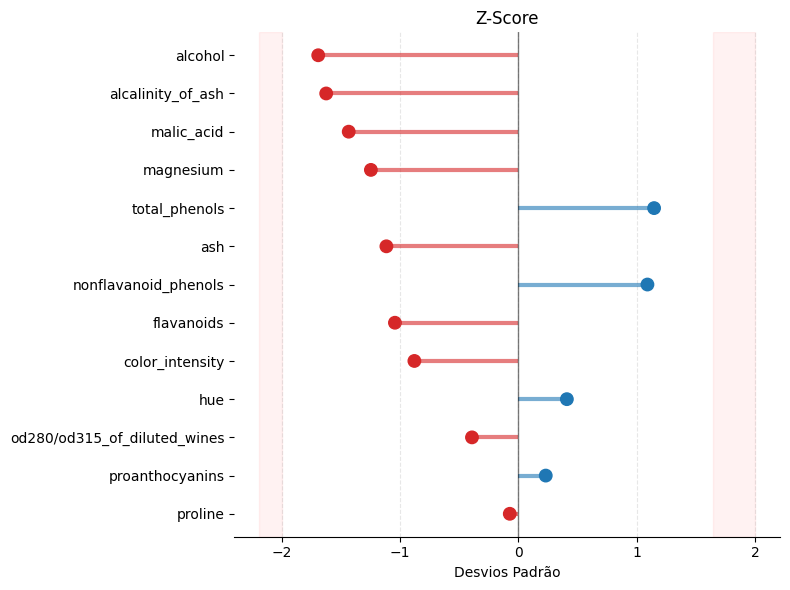

In [77]:
plot_zscore(get_rejected_zscore(position=0))

## **10.1. Hipotese**

Diferente de casos de super-extração, o perfil desta amostra — caracterizado por baixo álcool (-6,09%), baixa acidez e baixa cor — é um forte indicativo de diluição pré-colheita (excesso de chuvas durante a maturação). O fenômeno de hidratação excessiva das bagas dilui os solutos naturais da uva. A elevação contraditória dos fenóis não-flavonoides corrobora essa hipótese, sugerindo uma tentativa de correção enológica: diante de um mosto diluído, é provável que tenha ocorrido uma prensagem excessiva na tentativa de extrair cor, resultando na extração indesejada de compostos amargos das sementes.

## **11. Reflexão final**

Este caso valida a robustez da arquitetura de Rejeição por Incerteza. O modelo demonstrou capacidade de discernimento ao não aceitar um vinho que, embora geneticamente seja pertecente a Classe 2, não possui a tipicidade necessária para ser comercializado ou classificado como tal. O sistema atuou efetivamente como um filtro de qualidade, segregando um produto atípico e potencialmente defeituoso.